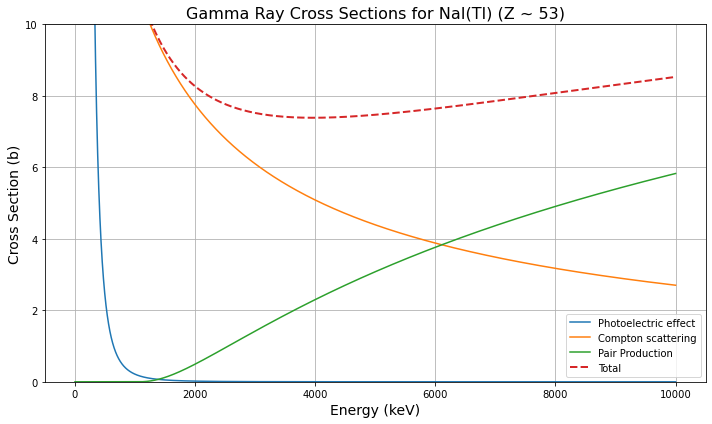

In [6]:
## Cross sections of photoelectric effect, Compton scattering, and pair production

import numpy as np
import matplotlib.pyplot as plt

Ee = 511                 # electron rest mass energy (keV)
Z = 53                   # NaI(Tl) crystal atomic number, approximated as atomic number of I since Na has Z = 11
alpha = 1/137            # fine structure constant
re = 2.8179403227e-15    # classical electron radius (m)

def photoelectric(Eg):
    '''
    Eg = gamma ray energy (keV)
    
    Returns photoelectric effect cross section (b)
    '''
    k = Eg/Ee
    
    if np.any(k <= 0):
        raise ValueError("All k values must be > 0")
    
    sigma = (16/3) * np.sqrt(2) * np.pi * re**2 * alpha**4 * (Z**5 / k**3.5)
    
    return sigma * (1e28) # sigma in barns

def compton(Eg):
    '''
    Eg = gamma ray energy (keV)
    
    Returns Compton scattering cross section (b)
    '''
    k = Eg/Ee
    
    if np.any(k <= 0):
        raise ValueError("All k values must be > 0")
    
    term1 = (1 + k) / (k**2)
    bracket1 = (2 * (1 + k) / (1 + 2 * k)) - (np.log(1 + 2 * k) / k)
    
    term2 = np.log(1 + 2 * k) / (2 * k)
    term3 = (1 + 3 * k) / ((1 + 2 * k)**2)
    
    sigma = Z * 2 * np.pi * re**2 * (term1 * bracket1 + term2 - term3)
    
    return sigma * 1e28 # sigma in barns

def pair_prod(Eg):
    '''
    Eg = gamma ray energy (keV)
    
    Returns pair production cross section (b)
    '''
    k = Eg/Ee
    
    if np.any(k <= 0):
        raise ValueError("All k values must be > 0")
    
    sigma = np.zeros_like(k)
    mask = k > 2  # Only valid for energies > 1.022 MeV = 1022 keV
    
    if np.any(mask):
        rho = (2 * k[mask] - 4) / (2 + k[mask] + 2 * np.sqrt(2 * k[mask]))
        term1 = Z**2 * alpha * re**2 * (2 * np.pi / 3)
        term2 = ((k[mask] - 2) / k[mask])**3
        rho_term = 1 + (0.5 * rho) + (23 / 40) * rho**2 + (11 / 60) * rho**3 + (29 / 960) * rho**4
        sigma[mask] = term1 * term2 * rho_term
    
    return sigma * 1e28 # sigma in barns

Eg = np.linspace(1,10000,10000) # gamma ray energy (keV)
sigma_pe = photoelectric(Eg)
sigma_c = compton(Eg)
sigma_pp = pair_prod(Eg)
sigma_total = sigma_pe + sigma_c + sigma_pp

plt.figure(figsize=(10, 6))

plt.plot(Eg, sigma_pe, label="Photoelectric effect")
plt.plot(Eg, sigma_c, label="Compton scattering")
plt.plot(Eg, sigma_pp, label="Pair Production")
plt.plot(Eg, sigma_total, label="Total", linestyle="--", linewidth=2)

plt.xlabel("Energy (keV)", fontsize=14)
plt.ylabel("Cross Section (b)", fontsize=14)
plt.title("Gamma Ray Cross Sections for NaI(Tl) (Z ~ 53)", fontsize=16)
#plt.yscale("log")
plt.ylim(0,10)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()